<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

## Получение данных

In [ ]:
import kagglehub

# Download latest version
path_to_ds = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print("Path to dataset files:", path_to_ds)

Using Colab cache for faster access to the 'housesalesprediction' dataset.
Path to dataset files: /kaggle/input/housesalesprediction


## Практические задания

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(path_to_ds + '/kc_house_data.csv', parse_dates=["date"])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Выполните предобработку данных

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
# Проверяем null ячейки
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
# Проверяем дубликаты
duplicates = df[df.duplicated()]
len(duplicates)

0

In [ ]:
df[:].describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated_post90,has_basement
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.028455,0.392680
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,53.505026,0.138564,0.140828,685.391304,27304.179631,0.166273,0.488358


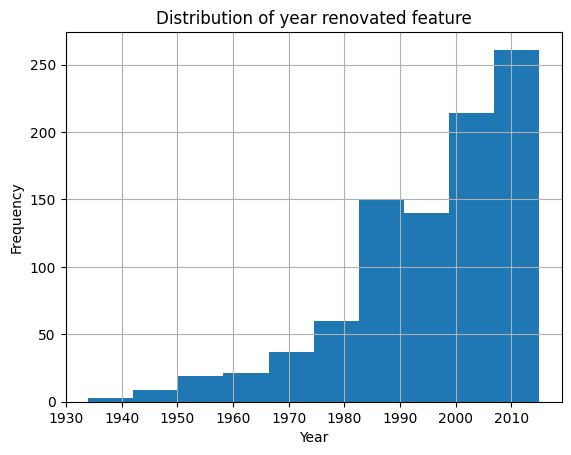

In [ ]:
import matplotlib.pyplot as plt

df[df['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")
plt.show()

In [ ]:
def renovation_feature(df):
    '''Создаем фичу был ли отремонтирован после 1990 и удаляем оригинальную фичу'''
    df['was_renovated_post90'] = df['yr_renovated'].map(lambda x: 1 if x > 1990 else 0)
    df = df.drop('yr_renovated', axis = 1)
    return df

df = renovation_feature(df)

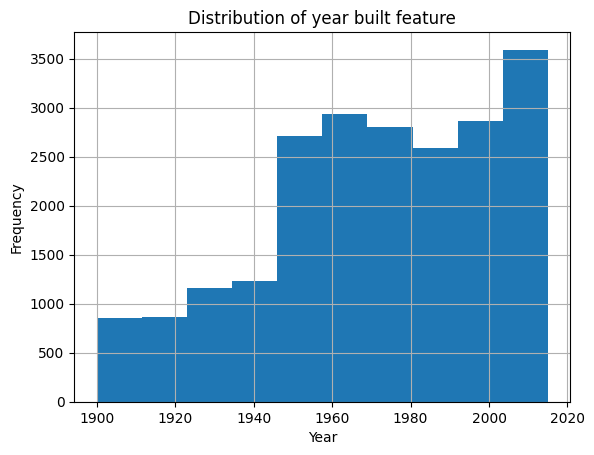

In [ ]:
df['yr_built'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of year built feature')
plt.show()

In [ ]:
def year_built(df):
    '''Категизируем фичу год строительства'''

    yr_built_bins = [1899, 1950, 1975, 1997, 2016]
    yr_built_labels = ['pre1950', '1950_to_1975', '1975_to_1997', '1997_to_2015']

    df['yr_built'] = pd.cut(df['yr_built'], bins = yr_built_bins, labels = yr_built_labels)

    return df

df = year_built(df)

In [ ]:
def has_basement(df):
    '''Создаем фичу есть ли подвал'''
    df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

df = has_basement(df)

In [ ]:
def viewed(df):
    '''Создаем фичу оценки, т.к. 0 преобладает в оригинальной фиче'''
    df['viewed'] = df['view'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('view', axis = 1)
    return df

df = viewed(df)

In [ ]:
def round_bathrooms(df):
    '''Округляем кол-во ванных'''
    df['bathrooms'] = df['bathrooms'].map(lambda x: int(round(x,0)))
    return df

df = round_bathrooms(df)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated_post90,has_basement,viewed
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,1180,1950_to_1975,98178,47.5112,-122.257,1340,5650,0,0,0
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,2170,1950_to_1975,98125,47.7210,-122.319,1690,7639,1,1,0
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,770,pre1950,98028,47.7379,-122.233,2720,8062,0,0,0
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,1050,1950_to_1975,98136,47.5208,-122.393,1360,5000,0,1,0
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,1680,1975_to_1997,98074,47.6168,-122.045,1800,7503,0,0,0


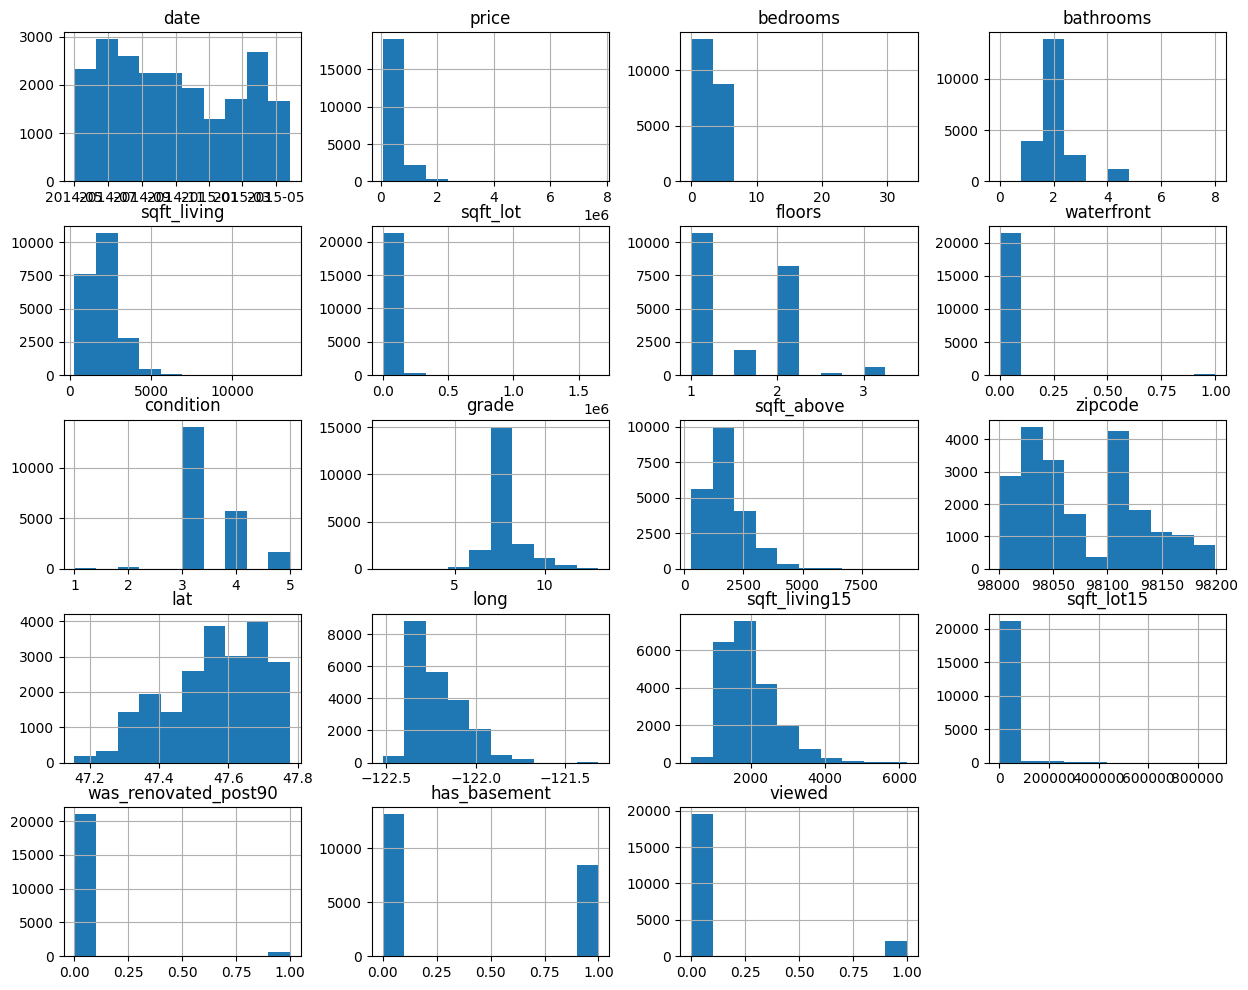

In [ ]:
df.hist(figsize = (15,12))
plt.show()

In [ ]:
# Посмотрим на возможные выбросы
df['bedrooms'].value_counts()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


In [ ]:
display(df[df['bedrooms'] == 33])
# Наверное хотели написать 3, а не 33
df.loc[15856, 'bedrooms'] = 3

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated_post90,has_basement,viewed
15870,2014-06-25,640000.0,33,2,1620,6000,1.0,0,5,7,1040,pre1950,98103,47.6878,-122.331,1330,4700,0,1,0


In [ ]:
def remove_outliers(df):
    '''Убираем данные, которые отличаются в 3 раза от стандарта каждой нужной колнки'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']

    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]

    return df

print(f"DF перед очисткой выбросов: {df.shape}")
df = remove_outliers(df)
print(f"DF после очистки выбросов: {df.shape}")

DF перед очисткой выбросов: (21613, 20)
DF после очистки выбросов: (20057, 20)


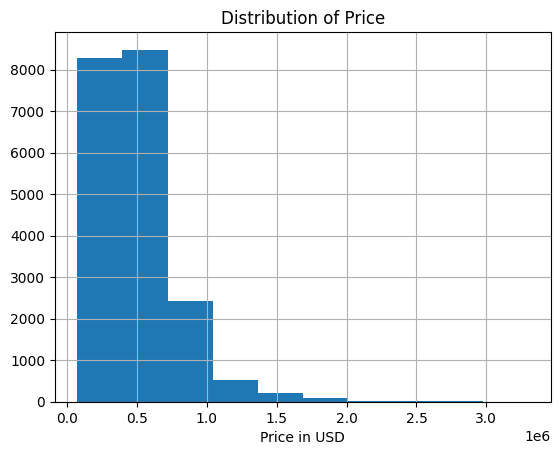

In [ ]:
df['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

In [ ]:
df['price'].describe()

,price
count,2.005700e+04
mean,5.059610e+05
std,2.813245e+05
min,7.500000e+04
25%,3.160000e+05
50%,4.400000e+05
75%,6.200000e+05
max,3.300000e+06


In [ ]:
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 825850.0
0.91 percentile: 850000.0
0.92 percentile: 875000.0
0.93 percentile: 905000.0
0.94 percentile: 945512.0
0.95 percentile: 990620.0
0.96 percentile: 1075000.0
0.97 percentile: 1200000.0
0.98 percentile: 1325000.0
0.99 percentile: 1580000.0


In [ ]:
df = df[df['price']<1600000]

In [ ]:
def sale_month_feature(df):
    df['sale_month'] = pd.DatetimeIndex(df['date']).month
    return df

df = sale_month_feature(df)

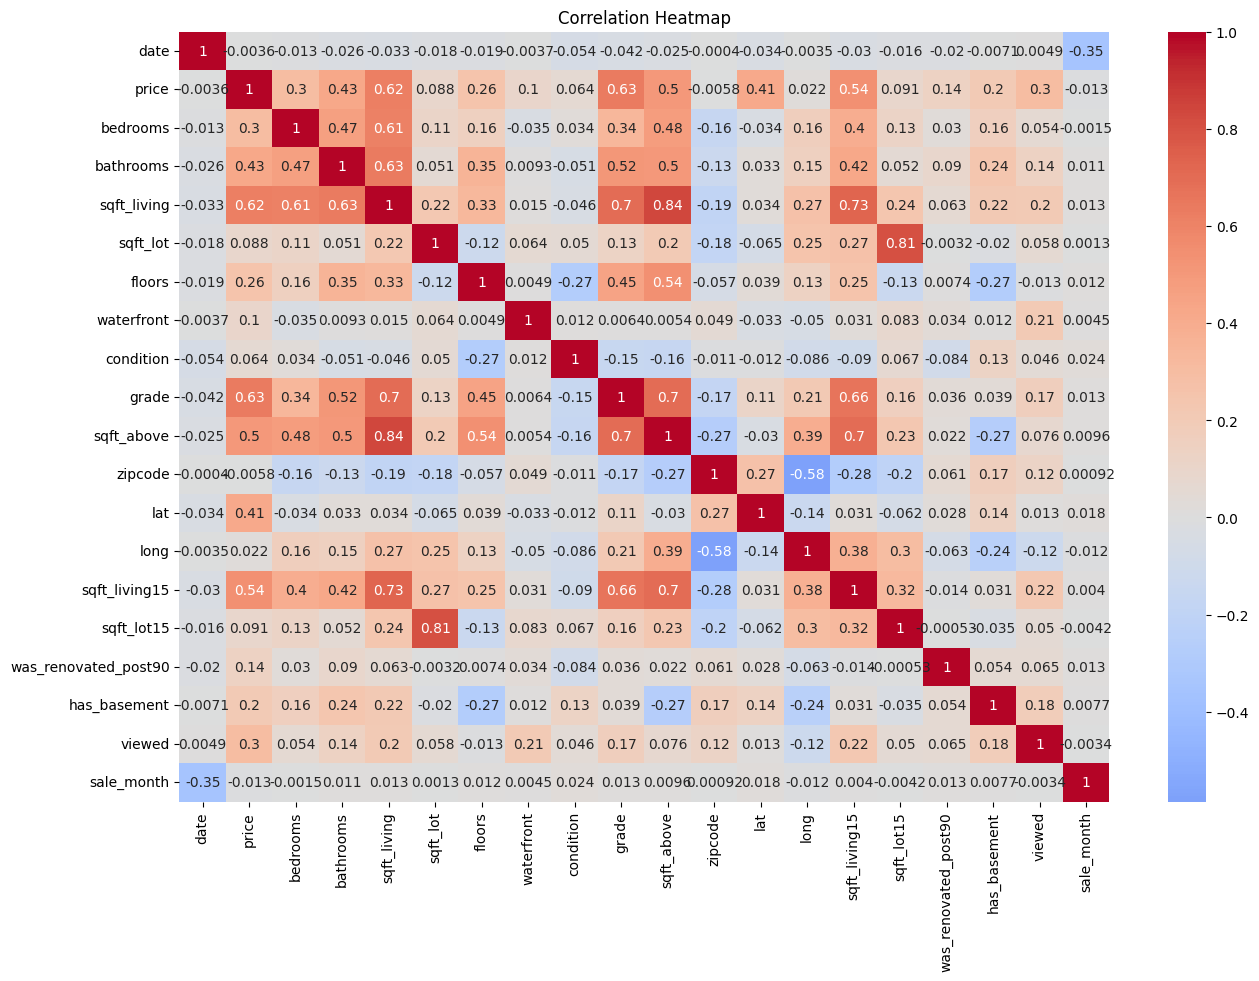

In [ ]:
import seaborn as sns

corr = df.loc[:, df.columns != 'yr_built'].corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def drop_corrfeats(df):
    '''Удаляем сильно коррелирующие фичи'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df

df = drop_corrfeats(df)

In [ ]:
def one_hot_encode(df, catcols):
    '''OHE переданных категориальных фичей'''
    dfonehot = df[catcols].astype('category')

    dfonehot = pd.get_dummies(dfonehot, drop_first = True)

    df = pd.concat([df,dfonehot], axis=1)

    df = df.drop(catcols, axis = 1)

    return df

df = one_hot_encode(df, 'yr_built')

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,was_renovated_post90,has_basement,viewed,sale_month,1950_to_1975,1975_to_1997,1997_to_2015
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,98178,47.5112,-122.257,0,0,0,10,True,False,False
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,98125,47.7210,-122.319,1,1,0,12,True,False,False
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,98028,47.7379,-122.233,0,0,0,2,False,False,False
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,98136,47.5208,-122.393,0,1,0,12,True,False,False
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,98074,47.6168,-122.045,0,0,0,2,False,True,False


In [ ]:
df.drop(['date'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,was_renovated_post90,has_basement,viewed,sale_month,1950_to_1975,1975_to_1997,1997_to_2015
0,221900.0,3,1,1180,5650,1.0,0,3,7,98178,47.5112,-122.257,0,0,0,10,True,False,False
1,538000.0,3,2,2570,7242,2.0,0,3,7,98125,47.7210,-122.319,1,1,0,12,True,False,False
2,180000.0,2,1,770,10000,1.0,0,3,6,98028,47.7379,-122.233,0,0,0,2,False,False,False
3,604000.0,4,3,1960,5000,1.0,0,5,7,98136,47.5208,-122.393,0,1,0,12,True,False,False
4,510000.0,3,2,1680,8080,1.0,0,3,8,98074,47.6168,-122.045,0,0,0,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3.0,0,3,8,98103,47.6993,-122.346,0,0,0,5,False,False,True
21609,400000.0,4,2,2310,5813,2.0,0,3,8,98146,47.5107,-122.362,0,0,0,2,False,False,True
21610,402101.0,2,1,1020,1350,2.0,0,3,7,98144,47.5944,-122.299,0,0,0,6,False,False,True
21611,400000.0,3,2,1600,2388,2.0,0,3,8,98027,47.5345,-122.069,0,0,0,1,False,False,True
